<a href="https://colab.research.google.com/github/lrssv/TimeSeriesForecastingCOVID19/blob/master/SARIMAX_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Useful turorials
# https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3
# https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_sarimax_stata.html

#Code by Rodrigo Silva

## Getting data

In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import timedelta

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Get data
series = pd.read_csv('/content/drive/My Drive/who dataset/up_dataset_who.csv',header=0, parse_dates=[0], index_col=0, squeeze=True)

# The term bfill means that we use the value before filling in missing values
series = pd.Series(series.fillna(series.bfill()))

print(series)

date_epicrv
2020-01-11 00:00:00+00:00       41
2020-01-12 00:00:00+00:00        0
2020-01-13 00:00:00+00:00        1
2020-01-14 00:00:00+00:00        1
2020-01-15 00:00:00+00:00        0
                             ...  
2020-04-30 00:00:00+00:00    72955
2020-05-01 00:00:00+00:00    85016
2020-05-02 00:00:00+00:00    90560
2020-05-03 00:00:00+00:00    84003
2020-05-04 00:00:00+00:00    86029
Name: 0, Length: 115, dtype: int64


## Getting the training set

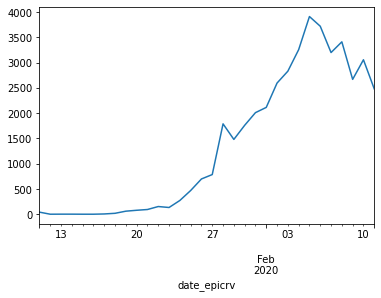

In [3]:
# Training set = some 30 days
ini = pd.to_datetime('2020-01-11 00:00:00+00:00')
end = pd.to_datetime('2020-02-11 00:00:00+00:00')
train = series[ini:end]

train.plot()

# Fit model

In [4]:
# Fit ARIMA
mod = sm.tsa.statespace.SARIMAX(train, trend='c', order=(1,1,1)) # Selected the parameters randomly
res = mod.fit(disp=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


### Test

In [0]:
# Forecast 7 days ahead
ini_test = end + timedelta(days=1)
end_test = ini_test + timedelta(days=6)

pred = res.get_prediction(start=pd.to_datetime(ini_test), end=pd.to_datetime(end_test), dynamic=False)

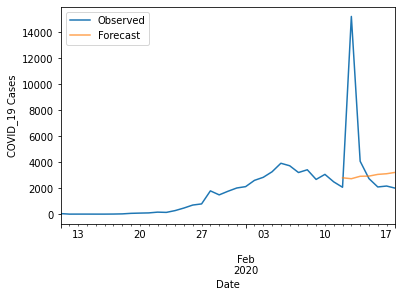

In [6]:
# Plot Results
ax = series[ini:end_test].plot(label='Observed')

pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)

ax.set_xlabel('Date')
ax.set_ylabel('COVID_19 Cases')
plt.legend()

plt.show()

In [7]:
# Compute error

predictions = np.array(pred.predicted_mean.values)
observations = np.array(series[ini_test:end_test].values)

MAE = np.sum(np.abs(predictions-observations))/len(predictions) 

print(observations)
print(predictions)
print('Mean absolute error (MAE):' + str(MAE))

[ 2066 15212  4068  2732  2090  2161  1993]
[2795.78638761 2724.13874509 2912.29959805 2925.33202682 3056.41280848
 3107.92104968 3213.0665424 ]
Mean absolute error (MAE):2528.582924551662
